<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/EDA/EDA_Top_Crew_%20Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **This the the code for the top Crew : actor, actresses, directors and writers**


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
#import sqlalchemy as sql
import datetime

from PIL import Image 

import pickle

# !pip install -q streamlit

In [ ]:
# name.basics, with just nconst, primaryname and primary profession

col_list = ['nconst','primaryName','primaryProfession']
name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list)

In [ ]:
#title.principals, with just tcont and nconst- this is the only table with both

col_list2 = ['tconst','nconst']
title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list2)

In [ ]:
top_movies= pd.merge(title_p, name_b, how='inner', on=['nconst', 'nconst'])

In [ ]:
# 1st pickle
top_movies.to_pickle('/content/tmg.pickle')

In [ ]:
top_movies5 = pd.read_pickle("/content/tmg.pickle")

In [ ]:
#title.ratings with tcont, averagerating and numvotes

col_list3 = ['tconst','averageRating','numVotes']
title_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list3)

In [ ]:
top_movies2= pd.merge(top_movies5, title_ratings, how='inner', on=['tconst', 'tconst'])

In [ ]:
#2nd pickle so we could read the data

top_movies2.to_pickle('/content/tmg4.pickle')

In [ ]:
top_movies = pd.read_pickle("/content/tmg4.pickle")

In [ ]:
top_movies.head()

tconst     nconst           primaryName  \
0  tt0000001  nm1588970            Carmencita   
1  tt0000001  nm0005690  William K.L. Dickson   
2  tt0000001  nm0374658         William Heise   
3  tt0000005  nm0005690  William K.L. Dickson   
4  tt0000005  nm0443482        Charles Kayser   

                   primaryProfession  averageRating  numVotes  
0                         soundtrack            5.7      1922  
1  cinematographer,director,producer            5.7      1922  
2  cinematographer,director,producer            5.7      1922  
3  cinematographer,director,producer            6.2      2544  
4                              actor            6.2      2544

In [ ]:
# title_basics  with tconts, titletype ans staryear
col_list5 = ['tconst','titleType','startYear']
title_basics = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list5)

In [ ]:
top_movies2= pd.merge(top_movies, title_basics, how='inner', on=['tconst', 'tconst'])

In [ ]:
# 3rt pickle

top_movies2.to_pickle('/content/tmg8.pickle')

NameError: ignored

In [ ]:
top_movies = pd.read_pickle("/content/tmg8.pickle")

In [ ]:
top_movies.head()

tconst     nconst           primaryName  \
0  tt0000001  nm1588970            Carmencita   
1  tt0000001  nm0005690  William K.L. Dickson   
2  tt0000001  nm0374658         William Heise   
3  tt0000005  nm0005690  William K.L. Dickson   
4  tt0000005  nm0443482        Charles Kayser   

                   primaryProfession  averageRating  numVotes titleType  \
0                         soundtrack            5.7      1922     short   
1  cinematographer,director,producer            5.7      1922     short   
2  cinematographer,director,producer            5.7      1922     short   
3  cinematographer,director,producer            6.2      2544     short   
4                              actor            6.2      2544     short   

  startYear  
0      1894  
1      1894  
2      1894  
3      1893  
4      1893

In [ ]:
top_movies['titleType'].value_counts()

tvEpisode       5192613
movie           2520294
short            923196
tvSeries         666163
tvMovie          432401
video            363239
tvMiniSeries     109745
tvSpecial         86015
videoGame         75683
tvShort           18288
Name: titleType, dtype: int64

In [ ]:
# Tables with just movies and shorts with the start year of 2022 or older.

condition = top_movies['titleType'] == 'movie'
condition6 = top_movies['titleType'] == 'short'
condition7 = top_movies['startYear'] <= '2022'
top_movies2 = top_movies[condition | condition6 & condition7][['nconst','primaryName','tconst','averageRating','primaryProfession','numVotes','titleType','startYear']]

In [ ]:
# wheighted_IMDB ( we took the formula from the imdb)

C = top_movies2['averageRating'].mean()

top_movies2['wheighted_IMDB'] = ((top_movies2['numVotes']/(top_movies2['numVotes']+25000))*top_movies2['averageRating']) + ((25000/(top_movies2['numVotes']+25000))*C)

In [ ]:
top_movies2.head()

nconst           primaryName     tconst  averageRating  \
0  nm1588970            Carmencita  tt0000001            5.7   
1  nm0005690  William K.L. Dickson  tt0000001            5.7   
2  nm0374658         William Heise  tt0000001            5.7   
3  nm0005690  William K.L. Dickson  tt0000005            6.2   
4  nm0443482        Charles Kayser  tt0000005            6.2   

                   primaryProfession  numVotes titleType startYear  \
0                         soundtrack      1922     short      1894   
1  cinematographer,director,producer      1922     short      1894   
2  cinematographer,director,producer      1922     short      1894   
3  cinematographer,director,producer      2544     short      1893   
4                              actor      2544     short      1893   

   wheighted_IMDB  
0        6.307601  
1        6.307601  
2        6.307601  
3        6.340061  
4        6.340061

In [ ]:
# split and explote the primary profession, to have one for row.

top_movies2["primaryProfession"] = top_movies2.primaryProfession.str.split(',')
top_movies_split = top_movies2.explode("primaryProfession")

In [ ]:
top_movies_split.head()

nconst           primaryName     tconst  averageRating  \
0  nm1588970            Carmencita  tt0000001            5.7   
1  nm0005690  William K.L. Dickson  tt0000001            5.7   
1  nm0005690  William K.L. Dickson  tt0000001            5.7   
1  nm0005690  William K.L. Dickson  tt0000001            5.7   
2  nm0374658         William Heise  tt0000001            5.7   

  primaryProfession  numVotes titleType startYear  wheighted_IMDB  
0        soundtrack      1922     short      1894        6.307601  
1   cinematographer      1922     short      1894        6.307601  
1          director      1922     short      1894        6.307601  
1          producer      1922     short      1894        6.307601  
2   cinematographer      1922     short      1894        6.307601

In [ ]:
top_movies_split['primaryProfession'].value_counts()

NameError: ignored

In [ ]:
top_movies_split.to_pickle('/content/tmg9.pickle')

In [ ]:
top_movies = pd.read_pickle("/content/tmg9.pickle")

In [ ]:
top_movies.head()

nconst           primaryName     tconst  averageRating  \
0  nm1588970            Carmencita  tt0000001            5.7   
1  nm0005690  William K.L. Dickson  tt0000001            5.7   
1  nm0005690  William K.L. Dickson  tt0000001            5.7   
1  nm0005690  William K.L. Dickson  tt0000001            5.7   
2  nm0374658         William Heise  tt0000001            5.7   

  primaryProfession  numVotes titleType startYear  wheighted_IMDB  
0        soundtrack      1922     short      1894        6.307601  
1   cinematographer      1922     short      1894        6.307601  
1          director      1922     short      1894        6.307601  
1          producer      1922     short      1894        6.307601  
2   cinematographer      1922     short      1894        6.307601

In [ ]:
top_movies['primaryProfession'].value_counts()

actor                        1212906
writer                       1019640
producer                      940203
director                      872491
actress                       590109
soundtrack                    365271
cinematographer               357892
composer                      303310
editor                        297071
miscellaneous                 268013
camera_department             267874
music_department              230989
assistant_director            123238
editorial_department          115169
production_manager             86373
sound_department               82973
art_department                 54949
production_designer            49653
script_department              33749
animation_department           32684
art_director                   32609
visual_effects                 31731
stunts                         26705
executive                      18188
casting_department             12705
casting_director               12390
special_effects                11383
l

In [ ]:
# condition_ms = top_movies_split.loc[((top_movies_split['titleType'] == 'movie') | (top_movies_split['titleType'] =='short')) & (top_movies_split['startYear'] <= '2022')]

In [ ]:
# In order to get the top actor:


condition = top_movies['primaryProfession'] == 'actor'

actors = top_movies[condition][['nconst','primaryName','tconst','averageRating','primaryProfession','titleType','startYear','wheighted_IMDB']]



In [ ]:
#See which is the movie with the higher wheighted_IMDB for our presentation

condition56 = actors['primaryName'] == 'Brad Pitt' 

actors2 = actors[condition56][['primaryName','tconst','wheighted_IMDB']]

actors2.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)


primaryName     tconst  wheighted_IMDB
4702831  Tom Cruise  tt1745960        8.284931
2650034  Tom Cruise  tt0095953        7.923647
1712491  Tom Cruise  tt0175880        7.878312
4702821  Tom Cruise  tt1631867        7.844854
3481305  Tom Cruise  tt0325710        7.722450
1864825  Tom Cruise  tt0181689        7.641605
2150071  Tom Cruise  tt4912910        7.605795
1915558  Tom Cruise  tt0104257        7.583946
3915210  Tom Cruise  tt0369339        7.433304
399536   Tom Cruise  tt0120663        7.421778

In [ ]:
# actors['wheighted_IMDB'].describe()

count    1.212906e+06
mean     6.358137e+00
std      1.269625e-01
min      2.186446e+00
25%      6.352332e+00
50%      6.354292e+00
75%      6.355361e+00
max      9.272556e+00
Name: wheighted_IMDB, dtype: float64

In [ ]:
# We wanted the count of number of movies, per actor and the mean of the wheighter imdb 

actor_group = actors.groupby(['primaryName']).agg({'wheighted_IMDB': 'mean','tconst' : 'count'}).reset_index()
tp = actor_group.sort_values(by=('wheighted_IMDB'), ascending=False)

In [ ]:
# To see actors with the most movies, we put a down limit of 50 movies

condition2 = tp['tconst'] > 50

t_actors = tp[condition2][['primaryName','tconst','wheighted_IMDB']]

top = t_actors.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)

primaryName  tconst  wheighted_IMDB
47666           Brad Pitt      64        6.852433
217898  Leonardo DiCaprio      56        6.834124
358980         Tom Cruise      53        6.771490
240597         Matt Damon      69        6.764370
359266          Tom Hanks      80        6.762062
8335            Al Pacino      55        6.731181
237817    Martin Scorsese      83        6.718440
70785      Clint Eastwood      94        6.690955
308616  Robert Downey Jr.      58        6.682724
98964      Dustin Hoffman      59        6.677194

In [ ]:
# actorst = t_actors.groupby('primaryName')['tconst'].count().reset_index(name='count_actors_movie') 
# tp = actorst.sort_values(by=('count_actors_movie'), ascending=False)

# top = actorst.sort_values(by=('count_actors_movie'), ascending=False).head(10)

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")
ax = sns.barplot(data=top, y="primaryName", x="tconst", color ='steelblue')
ax.set(title = 'TOP ACTORS')
ax.set(xlabel='Nº movies', ylabel='Actors')

# ax = sns.barplot(data=top, y="primaryName", x="count_actors_movie",color="seagreen")

fig03 = ax.get_figure()
fig03.savefig("sns_titles.png", bbox_inches = "tight")

In [ ]:
# not using

actor = str(input("Choose an actor "))
result=tp.loc[tp['primaryName'] == actor, 'count_actors_movie']
if result.empty:
  print("actor is not on the list")
else:
  print(result)

Choose an actor Brian Grazer
3056    66
Name: count_actors_movie, dtype: int64


In [ ]:
# In order to get the top actress: (the rest is the same process as the actor)
condition45 = top_movies['primaryProfession'] == 'actress'
actress= top_movies[condition45][['nconst','primaryName','tconst','averageRating','wheighted_IMDB','primaryProfession','titleType','startYear']]

In [ ]:
actress_group = actress.groupby(['primaryName']).agg({'wheighted_IMDB': 'mean','tconst' : 'count'}).reset_index()
tpa = actress_group.sort_values(by=('wheighted_IMDB'), ascending=False)


condition_a = tpa['tconst'] > 50

t_actress = tpa[condition_a][['primaryName','tconst','wheighted_IMDB']]

top_a = t_actress.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)

primaryName  tconst  wheighted_IMDB
36749      Cate Blanchett      67        6.615535
199185   Sigourney Weaver      53        6.544223
152601       Meryl Streep      73        6.540495
1044          Adile Nasit      55        6.533541
109156  Katharine Hepburn      51        6.531516
53797        Diane Keaton      54        6.531201
103249     Julianne Moore      66        6.516486
215174      Toni Collette      57        6.506511
214238      Tilda Swinton      74        6.487486
86174      Ingrid Bergman      67        6.481909

In [ ]:
#See which is the movie with the higher wheighted_IMDB for our presentation
condition77 = actress['primaryName'] == 'Cate Blanchett' 

actresstp = actress[condition77][['primaryName','tconst','wheighted_IMDB']]

actresstp.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)

primaryName     tconst  wheighted_IMDB
2605619  Cate Blanchett  tt3501632        7.849885
384114   Cate Blanchett  tt0421715        7.746401
6673772  Cate Blanchett  tt1646971        7.699806
2015538  Cate Blanchett  tt0338751        7.425969
3253257  Cate Blanchett  tt0876563        7.416086
507540   Cate Blanchett  tt0449467        7.412869
2488842  Cate Blanchett  tt2310332        7.353068
1527734  Cate Blanchett  tt0134119        7.290144
3983286  Cate Blanchett  tt2386490        7.230454
2231644  Cate Blanchett  tt2334873        7.196613

In [ ]:
# condition2 = actress['titleType'] == 'movie'
# condition3 = actress['titleType'] == 'short'
# condition4 = actress['startYear'] <= '2022'
# actress_ms = actress[condition2 | condition3 & condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]


In [ ]:
# actress_ms['primaryProfession'].value_counts()

actress    590109
Name: primaryProfession, dtype: int64

In [ ]:
# condition4 = actress_ms['wheighted'] > actress_ms["wheighted"].mean()

# t_actress = actress_ms[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

# actress_t = t_actress.groupby('primaryName')['tconst'].count().reset_index(name='count_actress_movie') 

# top_a = actress_t.sort_values(by=('count_actress_movie'), ascending=False).head(10)


[Text(0, 0.5, 'Actresses'), Text(0.5, 0, 'Nº movies')]

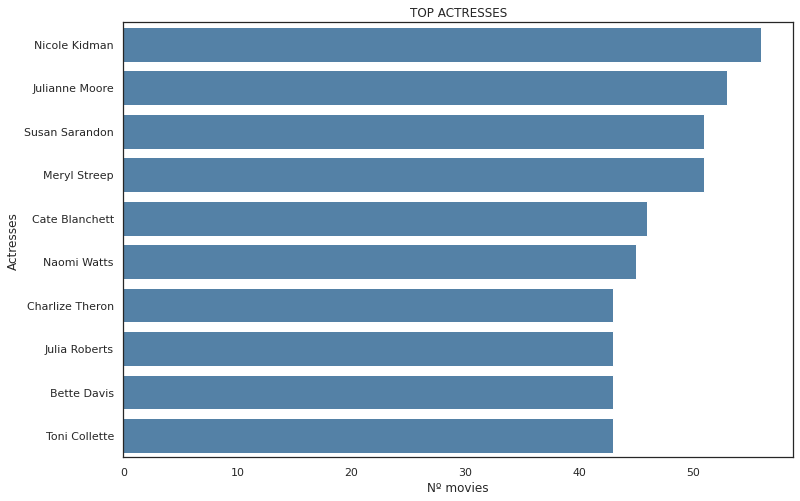

In [ ]:
# sns.set(rc={'figure.figsize':(12,8)})
# sns.set_style("white")
# ax2 = sns.barplot(data=top_a, y="primaryName", x="count_actress_movie", color ='steelblue')
# ax2.set(title = 'TOP ACTRESSES')
# ax2.set(xlabel='Nº movies', ylabel='Actresses')


In [ ]:
# In order to get the top writer: (the rest is the same process as the actor and actresses)

condition4 = top_movies['primaryProfession'] == 'writer'
writer = top_movies[condition4][['nconst','primaryName','tconst','averageRating','wheighted_IMDB','primaryProfession','titleType','startYear']]

In [ ]:
writer_group = writer.groupby(['primaryName']).agg({'wheighted_IMDB': 'mean','tconst' : 'count'}).reset_index()
tpw = writer_group.sort_values(by=('wheighted_IMDB'), ascending=False)


condition_w = tpw['tconst'] > 50

t_writer = tpw[condition_w][['primaryName','tconst','wheighted_IMDB']]

top_w = t_writer.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)

primaryName  tconst  wheighted_IMDB
247843  Steven Spielberg      65        6.878674
10122   Alfred Hitchcock      76        6.701597
99885      Harrison Ford      57        6.687558
4875      Akira Kurosawa      75        6.671080
105987      Ian McKellen      59        6.653343
41744     Cate Blanchett      67        6.615535
31998       Billy Wilder      75        6.613381
225898    Roman Polanski      51        6.603770
226202        Ron Howard      61        6.600785
144859       Kemal Sunal      75        6.600314

In [ ]:
#See which is the movie with the higher wheighted_IMDB for our presentation

condition766 = writer['primaryName'] == 'Steven Spielberg' 

t_writer2 = writer[condition766][['primaryName','tconst','wheighted_IMDB','primaryProfession']]

t_writer2.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)

primaryName     tconst  wheighted_IMDB primaryProfession
1984300  Steven Spielberg  tt0108052        8.951775            writer
1984370  Steven Spielberg  tt0120815        8.560088            writer
1984220  Steven Spielberg  tt0082971        8.348147            writer
1265697  Steven Spielberg  tt0107290        8.154238            writer
1562909  Steven Spielberg  tt0097576        8.140610            writer
1609959  Steven Spielberg  tt0264464        8.056289            writer
1763008  Steven Spielberg  tt0073195        8.030639            writer
1984230  Steven Spielberg  tt0083866        7.810930            writer
1864822  Steven Spielberg  tt0181689        7.641605            writer
1996055  Steven Spielberg  tt0089218        7.587502            writer

In [ ]:
# condition4 = writer['startYear'] <= '2022'

# condition2 = writer['titleType'] == 'movie'
# condition3 = writer['titleType'] == 'short'
# writer_ms = writer[condition2 | condition3 & condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

In [ ]:
# writer_ms['titleType'].value_counts()

movie    763521
short    256119
Name: titleType, dtype: int64

In [ ]:
# condition4 = writer_ms['wheighted'] > writer_ms['wheighted'].mean()
# t_writer = writer_ms[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]

In [ ]:
# top_w = t_writer.groupby('primaryName')['tconst'].count().reset_index(name='count_writer_movie') 

# top_w = top_w .sort_values(by=('count_writer_movie'), ascending=False).head(10)


[Text(0, 0.5, 'Writers'), Text(0.5, 0, 'Nº movies')]

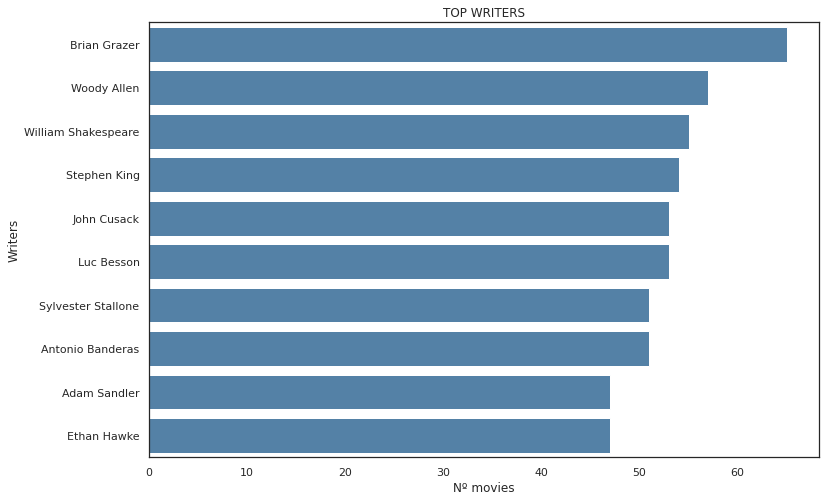

In [ ]:
# sns.set(rc={'figure.figsize':(12,8)})
# sns.set_style("white")
# ax3 = sns.barplot(data=top_w, y="primaryName", x="count_writer_movie", color ='steelblue')
# ax3.set(title = 'TOP WRITERS')
# ax3.set(xlabel='Nº movies', ylabel='Writers')

In [ ]:
# In order to get the top director: (the rest is the same process as the actor, actresses and writters)

condition55 = top_movies['primaryProfession'] == 'director'
director = top_movies[condition55][['nconst','primaryName','tconst','averageRating','wheighted_IMDB','primaryProfession','titleType','startYear']]
director['primaryProfession'].value_counts()

director    872491
Name: primaryProfession, dtype: int64

In [ ]:
#See which is the movie with the higher wheighted_IMDB for our presentation
condition768 = director['primaryName'] == 'Martin Scorsese' 

t_director5 = director[condition768][['primaryName','tconst','wheighted_IMDB']]

top_d = t_director5.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)

primaryName     tconst  wheighted_IMDB
2015427  Martin Scorsese  tt0099685        8.650170
1915675  Martin Scorsese  tt0407887        8.460019
2015893  Martin Scorsese  tt0993846        8.167466
2015947  Martin Scorsese  tt1130884        8.165212
1093409  Martin Scorsese  tt0075314        8.145770
2015444  Martin Scorsese  tt0112641        8.115066
2015407  Martin Scorsese  tt0081398        8.078150
2016002  Martin Scorsese  tt1302006        7.711974
1337358  Martin Scorsese  tt0085794        7.520720
2015483  Martin Scorsese  tt0217505        7.438671

In [ ]:
# director_group = director.groupby(['primaryName']).agg({'wheighted_IMDB': 'mean','tconst' : 'count'}).reset_index()
# tpdirector = director_group.sort_values(by=('wheighted_IMDB'), ascending=False)


# condition_director = tpdirector['tconst'] > 50

# t_director = tpdirector[condition_director][['primaryName','tconst','wheighted_IMDB']]

# t_director.sort_values(by=('wheighted_IMDB'), ascending=False).head(10)

primaryName  tconst  wheighted_IMDB
190571  Steven Spielberg      65        6.878674
131761   Martin Scorsese      83        6.718440
8124    Alfred Hitchcock      76        6.701597
39036     Clint Eastwood      94        6.690955
169556      Ridley Scott      56        6.679709
3824      Akira Kurosawa      75        6.671080
175095     Russell Crowe      53        6.642198
24754       Billy Wilder      75        6.613381
87503      James Stewart      89        6.608482
173281    Roman Polanski      51        6.603770

In [ ]:
# condition26 = director['titleType'] == 'movie'
# condition36 = director['titleType'] == 'short'
# condition4 = director['startYear'] <= '2022'

# director_ms = director[condition26 | condition36 & condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType','startYear']]


In [ ]:
director_ms['titleType'].value_counts()

movie    625471
short    247020
Name: titleType, dtype: int64

In [ ]:
# condition6 = director_ms['wheighted'] > director_ms["wheighted"].mean()
# t_director = director_ms[condition6][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession','titleType']]

In [ ]:
# director_t = t_director.groupby('primaryName')['tconst'].count().reset_index(name='count_director_movie') 

# top_d = director_t.sort_values(by=('count_director_movie'), ascending=False).head(10)
# top_d

primaryName  count_director_movie
3107   Clint Eastwood                    66
17129     Woody Allen                    58
10014      Luc Besson                    55
3526     Danny DeVito                    51
11036      Mel Gibson                    51
169     Aditya Chopra                    49
14027  Robert Redford                    48
13447  Randall Emmett                    48
1259   Anurag Kashyap                    46
13828    Ridley Scott                    46

[Text(0, 0.5, 'Directors'), Text(0.5, 0, 'Nº movies')]

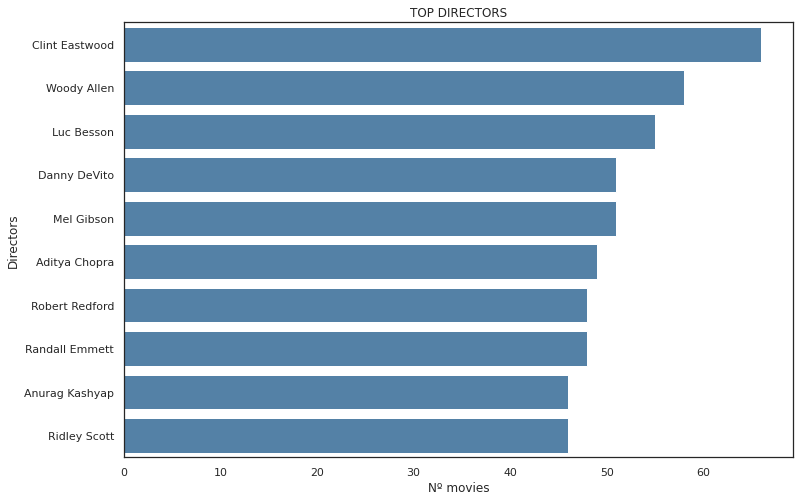

In [ ]:
# sns.set(rc={'figure.figsize':(12,8)})
# sns.set_style("white")
# ax4 = sns.barplot(data=top_d, y="primaryName", x="count_director_movie",color ='steelblue')
# ax4.set(title = 'TOP DIRECTORS')
# ax4.set(xlabel='Nº movies', ylabel='Directors')